## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [5]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [7]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [15]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
#input_layer = keras.layers.Input([x_train.shape[-1]])
model.add(Dense( 512,input_shape=x_train.shape[1:],kernel_initializer='uniform')) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 256, kernel_initializer='uniform')) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 128, kernel_initializer='uniform')) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10, kernel_initializer='uniform')) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
__________

In [16]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [17]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0721 17:46:48.197366 4467930560 deprecation.py:323] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0721 17:46:48.264090 4467930560 deprecation_wrapper.py:119] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.9084 - acc: 0.3012 - val_loss: 1.7783 - val_acc: 0.3627
Epoch 2/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.7070 - acc: 0.3848 - val_loss: 1.6229 - val_acc: 0.4157
Epoch 3/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.6162 - acc: 0.4208 - val_loss: 1.6044 - val_acc: 0.4285
Epoch 4/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.5487 - acc: 0.4451 - val_loss: 1.5074 - val_acc: 0.4629
Epoch 5/500
50000/50000 [==============================] - 11s 213us/step - loss: 1.5010 - acc: 0.4647 - val_loss: 1.5068 - val_acc: 0.4689
Epoch 6/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.4608 - acc: 0.4758 - val_loss: 1.4598 - val_acc: 0.4790
Epoch 7/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.4312 - acc: 0.4872 - val_loss: 

50000/50000 [==============================] - 7s 132us/step - loss: 0.5093 - acc: 0.8170 - val_loss: 2.0342 - val_acc: 0.5143
Epoch 60/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.4908 - acc: 0.8234 - val_loss: 2.0470 - val_acc: 0.5205
Epoch 61/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.4896 - acc: 0.8232 - val_loss: 2.1665 - val_acc: 0.5117
Epoch 62/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.4700 - acc: 0.8307 - val_loss: 2.1272 - val_acc: 0.5159
Epoch 63/500
50000/50000 [==============================] - 8s 150us/step - loss: 0.4641 - acc: 0.8334 - val_loss: 2.1509 - val_acc: 0.5152
Epoch 64/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.4494 - acc: 0.8374 - val_loss: 2.2337 - val_acc: 0.5141
Epoch 65/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.4326 - acc: 0.8447 - val_loss: 2.2612 - val_acc: 0.5144
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 7s 137us/step - loss: 0.2758 - acc: 0.9019 - val_loss: 3.4842 - val_acc: 0.4975
Epoch 118/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.2220 - acc: 0.9205 - val_loss: 3.4865 - val_acc: 0.5098
Epoch 119/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.1802 - acc: 0.9355 - val_loss: 3.3954 - val_acc: 0.5139
Epoch 120/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.2050 - acc: 0.9263 - val_loss: 3.5185 - val_acc: 0.5082
Epoch 121/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.1976 - acc: 0.9279 - val_loss: 3.6331 - val_acc: 0.5108
Epoch 122/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.2189 - acc: 0.9215 - val_loss: 3.5301 - val_acc: 0.5073
Epoch 123/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.2001 - acc: 0.9282 - val_loss: 3.5156 - val_acc: 0.5077
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 7s 144us/step - loss: 0.1116 - acc: 0.9613 - val_loss: 4.0793 - val_acc: 0.5065
Epoch 176/500
50000/50000 [==============================] - 8s 162us/step - loss: 0.1588 - acc: 0.9450 - val_loss: 4.1541 - val_acc: 0.5014
Epoch 177/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.1620 - acc: 0.9438 - val_loss: 4.1112 - val_acc: 0.5016
Epoch 178/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.1004 - acc: 0.9650 - val_loss: 4.0911 - val_acc: 0.5059
Epoch 179/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.1584 - acc: 0.9441 - val_loss: 4.1307 - val_acc: 0.4951
Epoch 180/500
50000/50000 [==============================] - 9s 182us/step - loss: 0.1564 - acc: 0.9443 - val_loss: 4.1968 - val_acc: 0.4967
Epoch 181/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.1520 - acc: 0.9463 - val_loss: 4.1551 - val_acc: 0.4943
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 9s 185us/step - loss: 0.0675 - acc: 0.9766 - val_loss: 4.4635 - val_acc: 0.5086
Epoch 234/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.0648 - acc: 0.9778 - val_loss: 4.5323 - val_acc: 0.5084
Epoch 235/500
50000/50000 [==============================] - 10s 210us/step - loss: 0.1614 - acc: 0.9470 - val_loss: 4.4207 - val_acc: 0.4903
Epoch 236/500
50000/50000 [==============================] - 10s 193us/step - loss: 0.1396 - acc: 0.9535 - val_loss: 4.5361 - val_acc: 0.5060
Epoch 237/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.1392 - acc: 0.9528 - val_loss: 4.3985 - val_acc: 0.5061
Epoch 238/500
50000/50000 [==============================] - 10s 190us/step - loss: 0.0709 - acc: 0.9752 - val_loss: 4.5335 - val_acc: 0.5052
Epoch 239/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.1095 - acc: 0.9628 - val_loss: 4.4934 - val_acc: 0.5039
Epoch 240/500
50000/500

50000/50000 [==============================] - 7s 146us/step - loss: 0.1629 - acc: 0.9482 - val_loss: 4.7886 - val_acc: 0.4862
Epoch 292/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.1906 - acc: 0.9403 - val_loss: 4.6252 - val_acc: 0.5073
Epoch 293/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.0732 - acc: 0.9748 - val_loss: 4.6817 - val_acc: 0.5055
Epoch 294/500
50000/50000 [==============================] - 8s 159us/step - loss: 0.0308 - acc: 0.9902 - val_loss: 4.7706 - val_acc: 0.5011
Epoch 295/500
50000/50000 [==============================] - 9s 182us/step - loss: 0.0633 - acc: 0.9779 - val_loss: 4.7952 - val_acc: 0.4998
Epoch 296/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.0849 - acc: 0.9701 - val_loss: 4.6863 - val_acc: 0.5041
Epoch 297/500
50000/50000 [==============================] - 11s 217us/step - loss: 0.0909 - acc: 0.9688 - val_loss: 4.8322 - val_acc: 0.4975
Epoch 298/500
50000/50000 

50000/50000 [==============================] - 8s 169us/step - loss: 0.0116 - acc: 0.9969 - val_loss: 4.9690 - val_acc: 0.5036
Epoch 350/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.1600 - acc: 0.9525 - val_loss: 4.8957 - val_acc: 0.5049
Epoch 351/500
50000/50000 [==============================] - 8s 167us/step - loss: 0.1998 - acc: 0.9412 - val_loss: 4.9236 - val_acc: 0.4935
Epoch 352/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.0971 - acc: 0.9681 - val_loss: 4.7601 - val_acc: 0.5074
Epoch 353/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.0592 - acc: 0.9800 - val_loss: 4.8523 - val_acc: 0.5059
Epoch 354/500
50000/50000 [==============================] - 9s 178us/step - loss: 0.0401 - acc: 0.9860 - val_loss: 4.8735 - val_acc: 0.4925
Epoch 355/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.0418 - acc: 0.9855 - val_loss: 4.8909 - val_acc: 0.5045
Epoch 356/500
50000/50000

50000/50000 [==============================] - 7s 136us/step - loss: 0.0109 - acc: 0.9975 - val_loss: 4.8192 - val_acc: 0.5152
Epoch 408/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.0129 - acc: 0.9964 - val_loss: 4.9496 - val_acc: 0.5105
Epoch 409/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.0211 - acc: 0.9935 - val_loss: 4.9103 - val_acc: 0.5107
Epoch 410/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.2829 - acc: 0.9231 - val_loss: 4.7606 - val_acc: 0.4959
Epoch 411/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.1372 - acc: 0.9571 - val_loss: 4.7743 - val_acc: 0.5047
Epoch 412/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0355 - acc: 0.9884 - val_loss: 4.7814 - val_acc: 0.5080
Epoch 413/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.0275 - acc: 0.9914 - val_loss: 4.7727 - val_acc: 0.5075
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 9s 175us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 4.8943 - val_acc: 0.5159
Epoch 466/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 4.9168 - val_acc: 0.5146
Epoch 467/500
50000/50000 [==============================] - 8s 156us/step - loss: 0.7997 - acc: 0.8197 - val_loss: 3.6229 - val_acc: 0.4924
Epoch 468/500
50000/50000 [==============================] - 8s 165us/step - loss: 0.1694 - acc: 0.9420 - val_loss: 3.9230 - val_acc: 0.5101
Epoch 469/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0438 - acc: 0.9870 - val_loss: 4.1510 - val_acc: 0.5090
Epoch 470/500
50000/50000 [==============================] - 8s 165us/step - loss: 0.0228 - acc: 0.9948 - val_loss: 4.2686 - val_acc: 0.5110
Epoch 471/500
50000/50000 [==============================] - 8s 154us/step - loss: 0.0122 - acc: 0.9982 - val_loss: 4.3518 - val_acc: 0.5149
Epoch 472/500
50000/50000 [

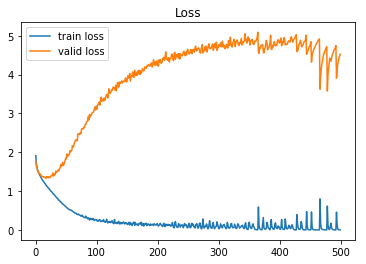

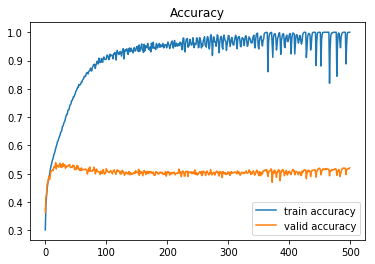

In [19]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [20]:
# Optimizer = SGD
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
modelSGD = Sequential()

#   第二步：構建網絡層
#input_layer = keras.layers.Input([x_train.shape[-1]])
modelSGD.add(Dense( 512,input_shape=x_train.shape[1:],kernel_initializer='uniform')) # 輸入層，28*28=784   
modelSGD.add(Activation('relu')) # 激活函數是relu   

modelSGD.add(Dense( 256, kernel_initializer='uniform')) # 隱藏層節點500個   
modelSGD.add(Activation('relu'))  

modelSGD.add(Dense( 128, kernel_initializer='uniform')) # 隱藏層節點500個   
modelSGD.add(Activation('relu'))  

modelSGD.add(Dense( 10, kernel_initializer='uniform')) # 輸出結果是10個類別，所以維度是10   
modelSGD.add(Activation('softmax')) # 最後一層用softmax作為激活函數
modelSGD.summary()

optimizer = keras.optimizers.SGD(lr=0.01, clipnorm=1)
modelSGD.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

"""
設定要訓練的 Epoch 數
"""
modelSGD.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_15 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
__________

50000/50000 [==============================] - 6s 120us/step - loss: 1.5567 - acc: 0.4382 - val_loss: 1.5712 - val_acc: 0.4369
Epoch 50/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.5524 - acc: 0.4412 - val_loss: 1.5624 - val_acc: 0.4356
Epoch 51/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.5481 - acc: 0.4428 - val_loss: 1.5632 - val_acc: 0.4407
Epoch 52/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.5431 - acc: 0.4442 - val_loss: 1.5603 - val_acc: 0.4395
Epoch 53/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.5390 - acc: 0.4466 - val_loss: 1.5662 - val_acc: 0.4357
Epoch 54/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.5345 - acc: 0.4490 - val_loss: 1.5488 - val_acc: 0.4450
Epoch 55/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.5302 - acc: 0.4484 - val_loss: 1.5452 - val_acc: 0.4473
Epoch 56/500
50000/50000 [=======

50000/50000 [==============================] - 6s 113us/step - loss: 1.3778 - acc: 0.5054 - val_loss: 1.4560 - val_acc: 0.4787
Epoch 108/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.3752 - acc: 0.5070 - val_loss: 1.4418 - val_acc: 0.4842
Epoch 109/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.3725 - acc: 0.5068 - val_loss: 1.4460 - val_acc: 0.4859
Epoch 110/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.3710 - acc: 0.5062 - val_loss: 1.4519 - val_acc: 0.4833
Epoch 111/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.3692 - acc: 0.5096 - val_loss: 1.4344 - val_acc: 0.4901
Epoch 112/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.3670 - acc: 0.5098 - val_loss: 1.4365 - val_acc: 0.4869
Epoch 113/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.3642 - acc: 0.5100 - val_loss: 1.4367 - val_acc: 0.4847
Epoch 114/500
50000/50000 [

50000/50000 [==============================] - 6s 125us/step - loss: 1.2621 - acc: 0.5490 - val_loss: 1.4015 - val_acc: 0.4968
Epoch 166/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.2617 - acc: 0.5489 - val_loss: 1.3835 - val_acc: 0.5070
Epoch 167/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.2602 - acc: 0.5490 - val_loss: 1.3935 - val_acc: 0.5040
Epoch 168/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.2582 - acc: 0.5479 - val_loss: 1.3792 - val_acc: 0.5086
Epoch 169/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.2556 - acc: 0.5481 - val_loss: 1.4344 - val_acc: 0.4880
Epoch 170/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.2537 - acc: 0.5508 - val_loss: 1.3867 - val_acc: 0.5028
Epoch 171/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.2527 - acc: 0.5522 - val_loss: 1.4104 - val_acc: 0.4990
Epoch 172/500
50000/50000 [

50000/50000 [==============================] - 7s 136us/step - loss: 1.1741 - acc: 0.5799 - val_loss: 1.3556 - val_acc: 0.5195
Epoch 224/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.1721 - acc: 0.5808 - val_loss: 1.3636 - val_acc: 0.5179
Epoch 225/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.1713 - acc: 0.5790 - val_loss: 1.3585 - val_acc: 0.5223
Epoch 226/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.1718 - acc: 0.5802 - val_loss: 1.3528 - val_acc: 0.5205
Epoch 227/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.1697 - acc: 0.5795 - val_loss: 1.3667 - val_acc: 0.5197
Epoch 228/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.1683 - acc: 0.5811 - val_loss: 1.3841 - val_acc: 0.5054
Epoch 229/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.1657 - acc: 0.5820 - val_loss: 1.3695 - val_acc: 0.5134
Epoch 230/500
50000/50000 [

50000/50000 [==============================] - 6s 110us/step - loss: 1.1045 - acc: 0.6018 - val_loss: 1.3555 - val_acc: 0.5221
Epoch 282/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.1042 - acc: 0.6041 - val_loss: 1.3577 - val_acc: 0.5217
Epoch 283/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.1021 - acc: 0.6050 - val_loss: 1.3495 - val_acc: 0.5270
Epoch 284/500
50000/50000 [==============================] - 5s 107us/step - loss: 1.1012 - acc: 0.6051 - val_loss: 1.3487 - val_acc: 0.5221
Epoch 285/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.1001 - acc: 0.6067 - val_loss: 1.3509 - val_acc: 0.5249
Epoch 286/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.0984 - acc: 0.6056 - val_loss: 1.3516 - val_acc: 0.5238
Epoch 287/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.0970 - acc: 0.6052 - val_loss: 1.3597 - val_acc: 0.5195
Epoch 288/500
50000/50000 [

50000/50000 [==============================] - 6s 119us/step - loss: 1.0434 - acc: 0.6250 - val_loss: 1.3831 - val_acc: 0.5162
Epoch 340/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.0423 - acc: 0.6247 - val_loss: 1.3476 - val_acc: 0.5278
Epoch 341/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.0425 - acc: 0.6251 - val_loss: 1.3578 - val_acc: 0.5260
Epoch 342/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.0403 - acc: 0.6273 - val_loss: 1.3568 - val_acc: 0.5290
Epoch 343/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.0399 - acc: 0.6253 - val_loss: 1.3620 - val_acc: 0.5233
Epoch 344/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.0366 - acc: 0.6284 - val_loss: 1.3683 - val_acc: 0.5221
Epoch 345/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.0375 - acc: 0.6273 - val_loss: 1.3700 - val_acc: 0.5234
Epoch 346/500
50000/50000 [

50000/50000 [==============================] - 6s 124us/step - loss: 0.9886 - acc: 0.6436 - val_loss: 1.3562 - val_acc: 0.5287
Epoch 398/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.9883 - acc: 0.6444 - val_loss: 1.3580 - val_acc: 0.5318
Epoch 399/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.9870 - acc: 0.6434 - val_loss: 1.3752 - val_acc: 0.5210
Epoch 400/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.9864 - acc: 0.6428 - val_loss: 1.3682 - val_acc: 0.5289
Epoch 401/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.9872 - acc: 0.6454 - val_loss: 1.3630 - val_acc: 0.5273
Epoch 402/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.9849 - acc: 0.6445 - val_loss: 1.3891 - val_acc: 0.5186
Epoch 403/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.9832 - acc: 0.6457 - val_loss: 1.3729 - val_acc: 0.5266
Epoch 404/500
50000/50000 [

50000/50000 [==============================] - 6s 121us/step - loss: 0.9408 - acc: 0.6619 - val_loss: 1.3911 - val_acc: 0.5241
Epoch 456/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.9399 - acc: 0.6596 - val_loss: 1.3840 - val_acc: 0.5285
Epoch 457/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.9384 - acc: 0.6619 - val_loss: 1.3776 - val_acc: 0.5286
Epoch 458/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.9388 - acc: 0.6614 - val_loss: 1.4006 - val_acc: 0.5235
Epoch 459/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.9368 - acc: 0.6623 - val_loss: 1.3746 - val_acc: 0.5314
Epoch 460/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.9359 - acc: 0.6641 - val_loss: 1.3809 - val_acc: 0.5275
Epoch 461/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.9340 - acc: 0.6611 - val_loss: 1.3727 - val_acc: 0.5294
Epoch 462/500
50000/50000 [

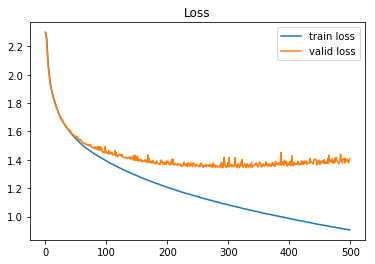

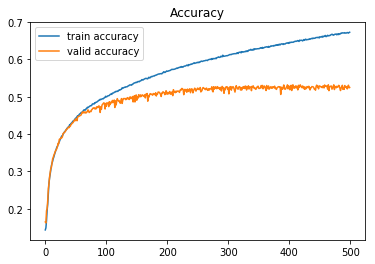

In [22]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程
%matplotlib inline

train_loss = modelSGD.history.history["loss"]
valid_loss = modelSGD.history.history["val_loss"]

train_acc = modelSGD.history.history["acc"]
valid_acc = modelSGD.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()